<a href="https://colab.research.google.com/github/FatemaTabassum/Data-Science-Projects/blob/main/Breast_cancer_wisconsin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I downloaded the dataset from kaggle

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv

# All the imports

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif, SequentialFeatureSelector, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

import seaborn as sns
import matplotlib.pyplot as plt

# import classifiers
from scipy.sparse.construct import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# import LGBMClassifier
from lightgbm import LGBMClassifier

# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import
from sklearn.ensemble import RandomForestClassifier

#import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics


<ipython-input-1-f69bb18a2bda>:14: DeprecationWarning: Please use `random` from the `scipy.sparse` namespace, the `scipy.sparse.construct` namespace is deprecated.
  from scipy.sparse.construct import random


# Load the Data

In [ ]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Let's have a the basic idea about each feature in the dataset

#print data type of each features

print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Describe columns of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


In [ ]:
count=df['diagnosis'].value_counts()
count

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=count.index, y=count[:],
            text=count[:],
            textposition='auto',
        )])

fig.show()

In [ ]:
# data_B = df[df['diagnosis'] == 'B']
# data_M = df[df['diagnosis'] == 'M']
# B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
# B_M_df = pd.DataFrame(df=B_M_data)
# B_M_df.plot(kind='bar', figsize=(10,4))

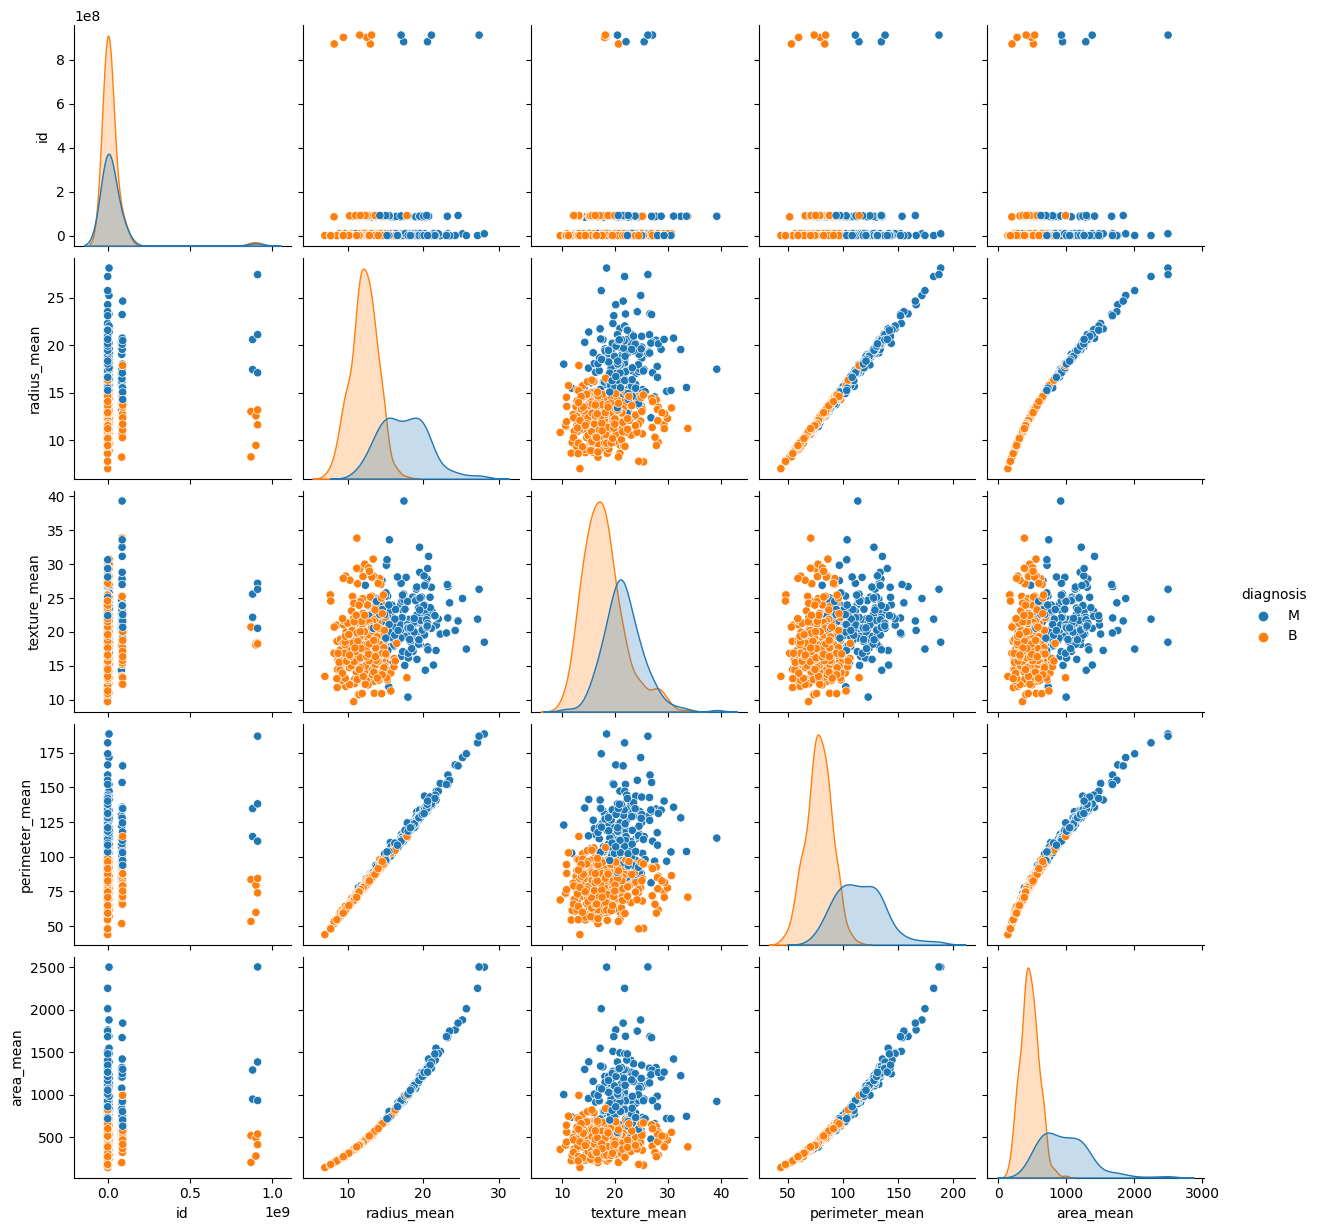

In [ ]:
#Create a pair plot


sns.pairplot(df.iloc[: ,0:6], hue = 'diagnosis')

B    357
M    212
Name: diagnosis, dtype: int64


'Typically, we will have a considerable large number of cases that represents negative vs. a small number of cases that represents positives (malignant) tumor'

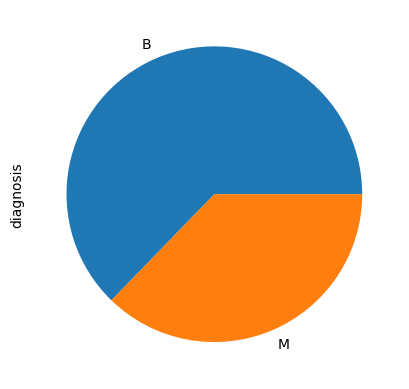

In [ ]:
#Show number of malignant (M) and benign (B) values in diagnosis target feature
# Display as pie chart

print(df["diagnosis"].value_counts())

df["diagnosis"].value_counts().plot(kind="pie")


'''Typically, we will have a considerable large number of cases that represents negative vs. a small number of cases that represents positives (malignant) tumor'''

In [ ]:
# check if there are null values in any of the columns.

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Lets remove unwanted features
# Unnamed: 32 columns has all null values. So lets delete it
# id column is not also necessary. Lets delete this column
columns_to_remove = ['Unnamed: 32', 'id']
df.drop(columns_to_remove, axis=1, inplace=True)

### Encode "Diagnosis" which is the Target to an Integer

In [ ]:
'''
The target column, diagnosis, is encoded as a string type categorical variable: M for malignant and B for benign.

Since there are only two classes, 0 will be used for benign and 1 for malignant.
'''

df["diagnosis"] = (df["diagnosis"] == 'M').astype('int')


### Seperating Features and The Target

In [ ]:
X = df.drop("diagnosis", axis = 1)
Y = df["diagnosis"]

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Define Common Functions

In [ ]:
def calculate_metrics(model, X_test, Y_test):

  '''Evaluate the particular Model using evaluation metrics on the Test dataset'''

  # Get the model predictions
  y_predict = model.predict(X_test)

  # Calculate evaluation metrics for assesing performance of the model.
  acc = accuracy_score(Y_test, y_predict)

  # roc_auc curve
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)

  # AUC score
  auc = metrics.roc_auc_score(Y_test, y_pred_proba)

  # Prec
  prec = precision_score(Y_test, y_predict)

  # Recall
  rec = recall_score(Y_test, y_predict)

  # F1 score
  f1 = f1_score(Y_test, y_predict)


  return model, acc, auc, prec, rec, f1, fpr, tpr



In [ ]:
def train_and_get_metrics(model, X_train, Y_train, X_test, Y_test):

  '''Train the particular model on the given Data'''
  model.fit(X_train, Y_train)

  # Make predictions on test dataset and calculate metrics.
  model, acc, auc, prec, rec, f1, fpr, tpr = calculate_metrics(model, X_test, Y_test)
  return model, acc, auc, prec, rec, f1, fpr, tpr


In [ ]:
def evaluate_model_on_features(model, X_train, X_test, Y_train, Y_test):
  '''train and display evaluation metrics.'''

  # Train the model, predict values and get metrics
  model, acc, auc, prec, rec, f1, fpr, tpr = train_and_get_metrics(model, X_train, Y_train, X_test, Y_test)

  # Construct a dataframe to display metrics.
  #display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", "Feature Count"])
  res = {'Accuracy':acc, 'AUC':auc, 'Precision':prec, 'Recall':rec, 'F1 Score':f1, "Feature Count": X_train.shape[1], "FPR": fpr, "TPR": tpr}
  return model, res


In [ ]:
def preprocess_and_generate_train_test_data(X, Y):
  # Split train and test sets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 145)

  # All features of dataset are float values. We normalize all the features of the train and test dataset here.
  scaler = StandardScaler().fit(X_train) # I need to look at how to customize this ##Liza
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  return X_train_scaled, X_test_scaled, Y_train, Y_test


In [ ]:
def get_all_the_models():
  models = []

  # log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
  # models.append(('LogisticRegression', log_reg))

  random_forest = RandomForestClassifier()        # I need to look at the random state and how to customize this ##Liza
  models.append(('RandomForest', random_forest))

  SV_model = SVC(probability=True, kernel = 'rbf', C = 0.1)
  models.append(('SVM', SV_model))

  KNN_model = KNeighborsClassifier(n_neighbors=1)
  models.append(('KNN', KNN_model))

  xgb_classifier = XGBClassifier()
  models.append(('XGBoost', xgb_classifier))


  # create a classifier object
  decsnTree = DecisionTreeClassifier(max_depth =20, random_state = 43)

  models.append(('DecisionTree', decsnTree))
  # create LightGBM Classifier
  lightgbm = LGBMClassifier()
  models.append(('LightGBM', lightgbm))
  # creat adaboost Classifier
  adaboost = AdaBoostClassifier()
  models.append(('AdaBoost', adaboost))

  # create Gaussian Naive Bayes model
  GaussNB = GaussianNB()
  models.append(('GaussianNB', GaussNB))


  return models

In [ ]:
def append_result(results_dic, res):
  results_dic['Accuracy'].append(res['Accuracy'])
  results_dic['AUC'].append(res['AUC'])
  results_dic['Precision'].append(res['Precision'])
  results_dic['Recall'].append(res['Recall'])
  results_dic['F1 Score'].append(res['F1 Score'])
  results_dic['Feature Count'].append(res['Feature Count'])
  results_dic["FPR"].append(res["FPR"])
  results_dic["TPR"].append(res["TPR"])
  #res = {'Accuracy':acc, 'ROC':roc, 'Precision':prec, 'Recall':rec, 'F1 Score':f1, "Feature Count": X.shape[1]}
  return results_dic

In [ ]:
def prepare_and_run_models(X, Y, feats):
  print(X.shape)

  results_dic = {'Accuracy':[], 'AUC': [], 'Precision':[], 'Recall': [], 'F1 Score':[], 'Feature Count': [], "FPR": [], "TPR": [] }
  models = get_all_the_models()
  names = []
  num_folds = 10
  seed = np.random.RandomState(0)
  scoring='accuracy'

  X_train, X_test, Y_train, Y_test = preprocess_and_generate_train_test_data(X, Y)
  display_df = []

  for name, model in models:
    model, res =  evaluate_model_on_features(model, X_train, X_test, Y_train, Y_test)
    if(feats == 'All_Feat'):
      names.append(name)
    elif(feats == 'Pearson'):
      names.append(name)
    elif(feats == 'Chi-Square'):
      names.append(name + ' + Chi-Square')

    # Append to results and display
    append_result(results_dic, res)
    #print(name, " ", model)
  result_df = pd.DataFrame(results_dic)
  model_names_df = pd.DataFrame({
      "Machine Learning Models": names
  })
  result_df.insert(0, "Machine Learning Models", names)
  #print(result_df.shape)
  #display(result_df)
  return result_df


# Establish Baseline (Using All Features)

### Multiple models without KFolds

In [ ]:

result_df = prepare_and_run_models(X, Y, feats = 'All_Feat')
print(result_df.shape)
display(result_df)
result_df_sorted = result_df.sort_values('Accuracy')

(569, 30)
(8, 9)


,Machine Learning Models,Accuracy,AUC,Precision,Recall,F1 Score,Feature Count,FPR,TPR
0,RandomForest,0.958042,0.996960,0.979592,0.905660,0.941176,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.39622641509433965, 0.5094339622641509,..."
1,SVM,0.951049,0.998323,1.000000,0.867925,0.929293,30,"[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...","[0.0, 0.018867924528301886, 0.9056603773584906..."
2,KNN,0.965035,0.960587,0.961538,0.943396,0.952381,30,"[0.0, 0.022222222222222223, 1.0]","[0.0, 0.9433962264150944, 1.0]"
3,XGBoost,0.958042,0.996646,0.979592,0.905660,0.941176,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.018867924528301886, 0.1886792452830188..."
4,DecisionTree,0.937063,0.930608,0.923077,0.905660,0.914286,30,"[0.0, 0.044444444444444446, 1.0]","[0.0, 0.9056603773584906, 1.0]"
5,LightGBM,0.951049,0.995388,0.960000,0.905660,0.932039,30,"[0.0, 0.0, 0.0, 0.022222222222222223, 0.022222...","[0.0, 0.018867924528301886, 0.9056603773584906..."
6,AdaBoost,0.958042,0.987631,0.960784,0.924528,0.942308,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.011111111111111112...","[0.0, 0.03773584905660377, 0.2641509433962264,..."
7,GaussianNB,0.965035,0.994969,0.980000,0.924528,0.951456,30,"[0.0, 0.0, 0.0, 0.0, 0.011111111111111112, 0.0...","[0.0, 0.7169811320754716, 0.7547169811320755, ..."


# Features Removing and Selection


## Pearson Correlation


In the context of feature selection, Pearson Correlation is a method used to measure the linear relationship between two variables. When used for feature selection, it is used to identify which features are strongly correlated with each other.

If two or more features are strongly correlated, it means that they contain similar information, and using both of them in the model might not be necessary. The intuition is that highly correlated features might introduce multicollinearity in the model, which can lead to unstable estimates and incorrect predictions. Therefore, removing one of the correlated features may be a good idea. This way we can keep the most relevant and independent features in the model. </p>




In [ ]:
# Calculate Correlation matrix with Pearson Correlation

cor = df.corr()

cor_target = abs(cor["diagnosis"])

# Select highly correlated features (threshold = 0.2)
relevant_features = cor_target[cor_target>0.3]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<ipython-input-22-8f088f51545f>:11: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



## Correlation Matrix of Relevant Features



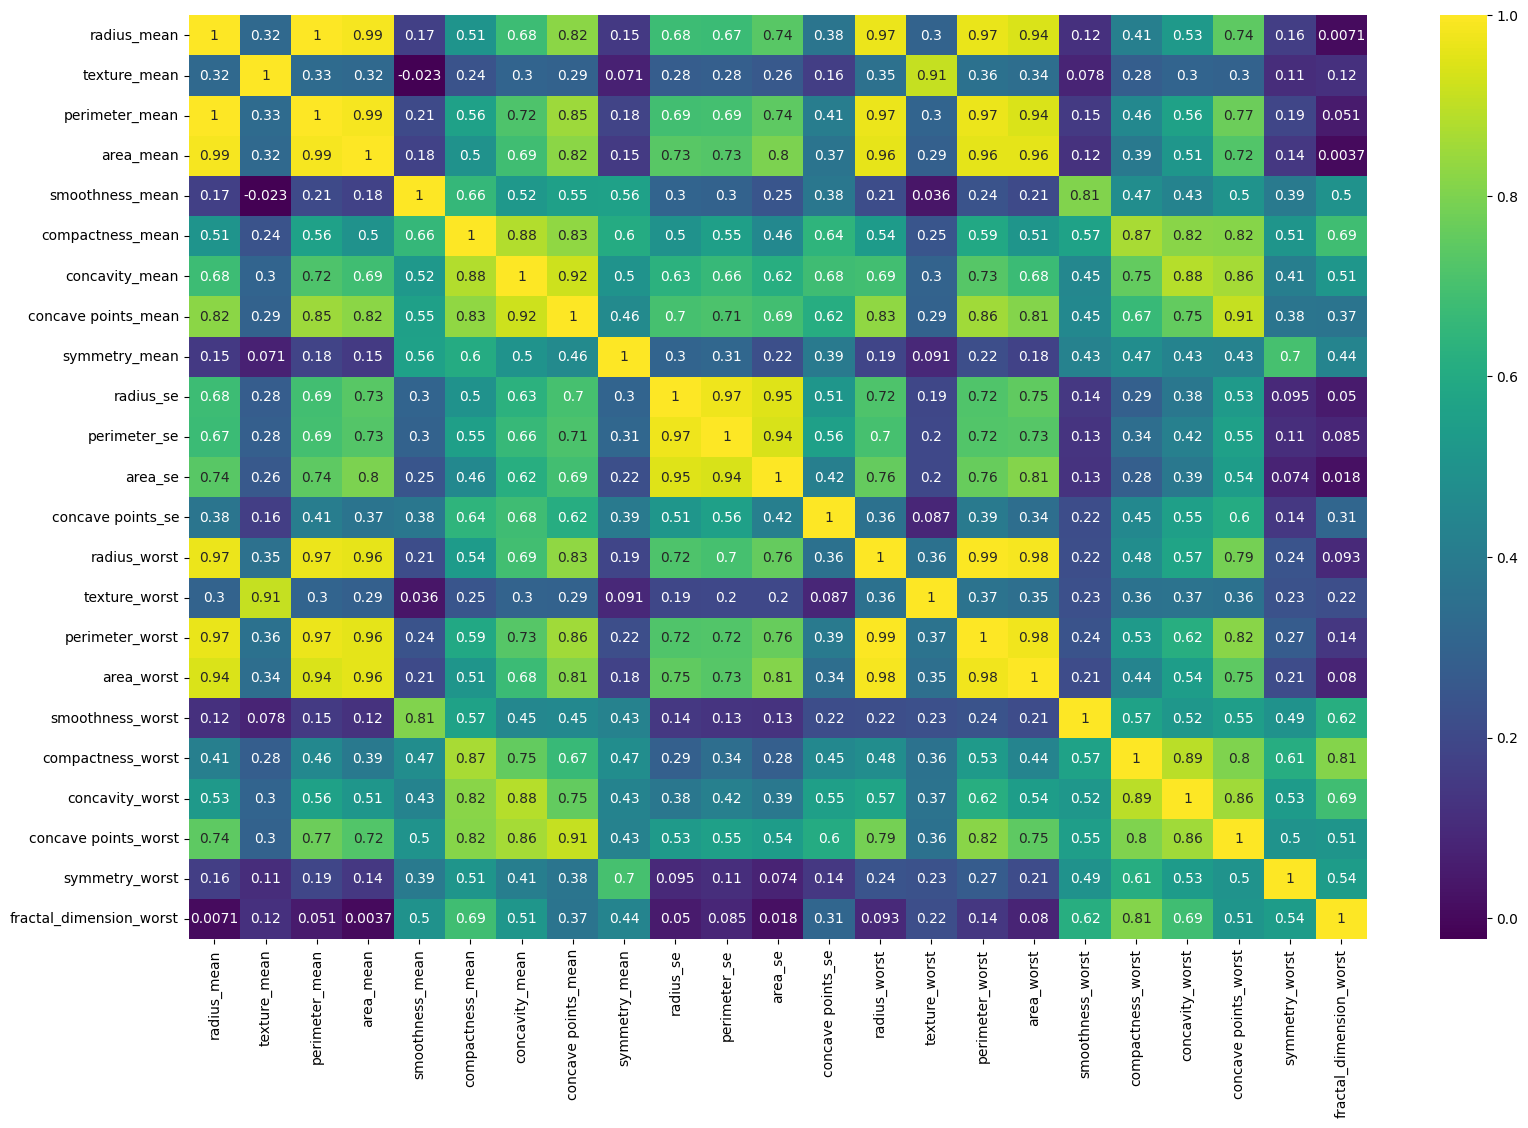

In [ ]:
'''
plt.figure(figsize=(19, 12))
# define the mask to set the values in the upper triangle to True
new_corr = df.corr()
heatmap = sns.heatmap(new_corr, annot=True, cmap='viridis')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':13}, pad=13);

'''

# Set figure size
plt.figure(figsize=(19,12))

# Calculate the correlation matrix for target relevant features
new_corr = df[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap='viridis')
plt.show()


## Reducing the number of Features which are Highly Correlated with each other
I did not code from this part - "Liza"

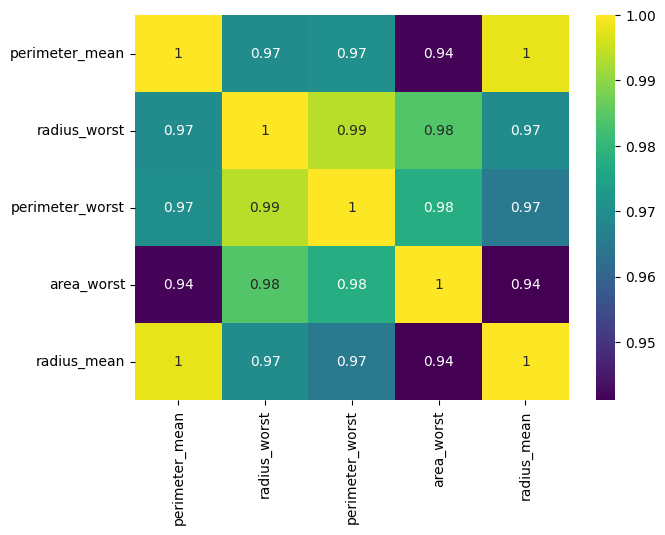

In [ ]:
# Closer View of the "radius_mean", "radius worst", "perimeter_worst", and "area_worst".
# "radius_mean" is highly correlated to some features like "radius worst", "perimeter_worst", and "area_worst".

# Set figure size
plt.figure(figsize=(7,5))

# Select a subset of features
new_corr = df[['perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'radius_mean']].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap="viridis")
plt.show()

In [ ]:
# Remove the features with high correlation to other features
print('Pearson_correlation')
subset_feature_corr_names = [x for x in names if x not in ['radius_worst', 'perimeter_worst', 'area_worst']]
reduced_df = df[subset_feature_corr_names]


Pearson_correlation


In [ ]:


# Calculate and check evaluation metrics
result_df = prepare_and_run_models(reduced_df, Y, feats='Pearson')
print(result_df.shape)
result_df_sorted = result_df.sort_values('Accuracy').reset_index(drop=True)
result_df_sorted


(569, 20)
(8, 9)


,Machine Learning Models,Accuracy,AUC,Precision,Recall,F1 Score,Feature Count,FPR,TPR
0,DecisionTree,0.930070,0.928931,0.890909,0.924528,0.907407,20,"[0.0, 0.06666666666666667, 1.0]","[0.0, 0.9245283018867925, 1.0]"
1,GaussianNB,0.930070,0.993082,0.938776,0.867925,0.901961,20,"[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...","[0.0, 0.6415094339622641, 0.8490566037735849, ..."
2,KNN,0.951049,0.945597,0.942308,0.924528,0.933333,20,"[0.0, 0.03333333333333333, 1.0]","[0.0, 0.9245283018867925, 1.0]"
3,SVM,0.958042,0.996436,1.000000,0.886792,0.940000,20,"[0.0, 0.0, 0.0, 0.011111111111111112, 0.011111...","[0.0, 0.018867924528301886, 0.8867924528301887..."
4,XGBoost,0.965035,0.999371,1.000000,0.905660,0.950495,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011...","[0.0, 0.018867924528301886, 0.1509433962264151..."
5,LightGBM,0.965035,0.996646,1.000000,0.905660,0.950495,20,"[0.0, 0.0, 0.0, 0.03333333333333333, 0.0333333...","[0.0, 0.018867924528301886, 0.9245283018867925..."
6,RandomForest,0.972028,0.998637,1.000000,0.924528,0.960784,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.3584905660377358, 0.49056603773584906,..."
7,AdaBoost,0.972028,0.980503,1.000000,0.924528,0.960784,20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05555555555555555,...","[0.0, 0.018867924528301886, 0.1132075471698113..."


# K-fold Cross validation score

In [ ]:
'''

from sklearn.model_selection import cross_val_score

models = get_all_the_models()
names = []
results_dic = {'Score':[]}
num_folds = 10
results = []



# All features of dataset are float values. We normalize all the features of the train and test dataset here.
scaler = StandardScaler().fit(X) # I need to look at how to customize this ##Liza
X_scaled = scaler.transform(X)
cnt = 0
for name, model in models:
  if(cnt == 0):
    model.mac_iter = 1000
    cnt = cnt + 1
  cv_score_lr = cross_val_score(model, reduced_df, Y, cv=6)
  mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
  mean_accuracy_lr = mean_accuracy_lr*100
  mean_accuracy_lr = round(mean_accuracy_lr, 2)
  res = mean_accuracy_lr
  #print(name, ' score = ', mean_accuracy_lr)
  names.append(name)
  results.append(res)
  #results_dic['Score'].append(res)

results_np = np.array(results)
names_np = np.array(names)
result_df = pd.DataFrame({'Score': results_np}, index = names_np)
# result_df_sorted = result_df.sort_values('Score')
# result_df_sorted
#print(result_df.shape)
display(result_df)
'''


"\n\nfrom sklearn.model_selection import cross_val_score\n\nmodels = get_all_the_models()\nnames = []\nresults_dic = {'Score':[]}\nnum_folds = 10\nresults = []\n\n\n\n# All features of dataset are float values. We normalize all the features of the train and test dataset here.\nscaler = StandardScaler().fit(X) # I need to look at how to customize this ##Liza\nX_scaled = scaler.transform(X)\ncnt = 0\nfor name, model in models:\n  if(cnt == 0):\n    model.mac_iter = 1000\n    cnt = cnt + 1\n  cv_score_lr = cross_val_score(model, reduced_df, Y, cv=6)\n  mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)\n  mean_accuracy_lr = mean_accuracy_lr*100\n  mean_accuracy_lr = round(mean_accuracy_lr, 2)\n  res = mean_accuracy_lr\n  #print(name, ' score = ', mean_accuracy_lr)\n  names.append(name)\n  results.append(res)\n  #results_dic['Score'].append(res)\n\nresults_np = np.array(results)\nnames_np = np.array(names)\nresult_df = pd.DataFrame({'Score': results_np}, index = names_np)\n# result_df_so

# Plotting graph

### Seaborn


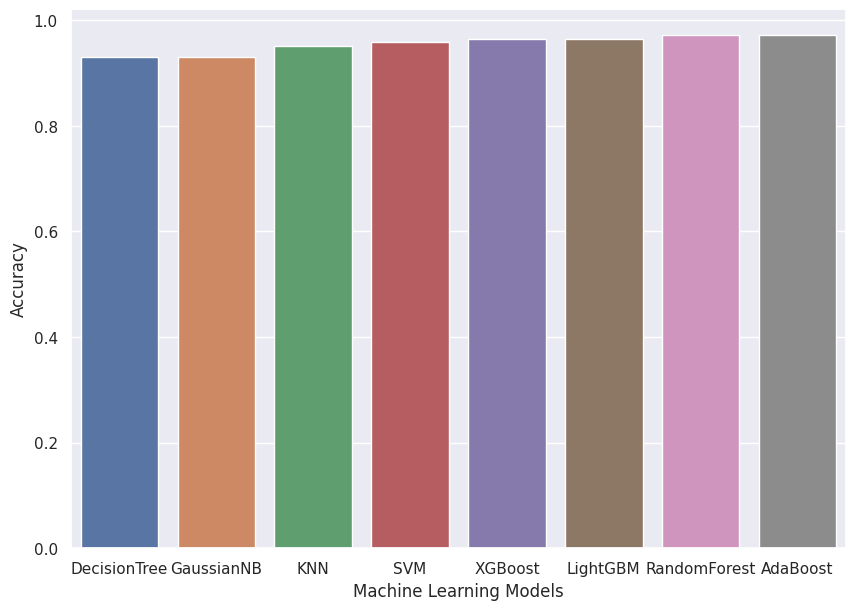

In [ ]:

# importing the required library
import seaborn as sns

#display(result_df_sorted)

sns.set(rc={'figure.figsize':(11.7,8.27)})

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))

# who v/s fare barplot
sns.barplot(x = 'Machine Learning Models',
            y = 'Accuracy',
            data = result_df_sorted,
            errwidth=0,
            ax = ax)

# Show the plot
plt.show()

### Matplotlib

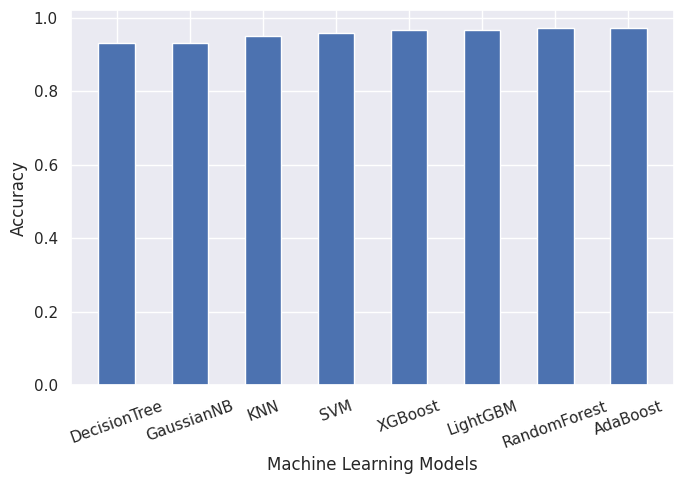

In [ ]:
# creating the bar plot for accuracy

models = result_df_sorted['Machine Learning Models']
acc = result_df_sorted['Accuracy']
# Figure Size
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True

# Horizontal Bar Plot
plt.bar(models, acc, width = 0.5)

plt.xticks(rotation=20)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")

# Show Plot
plt.show()

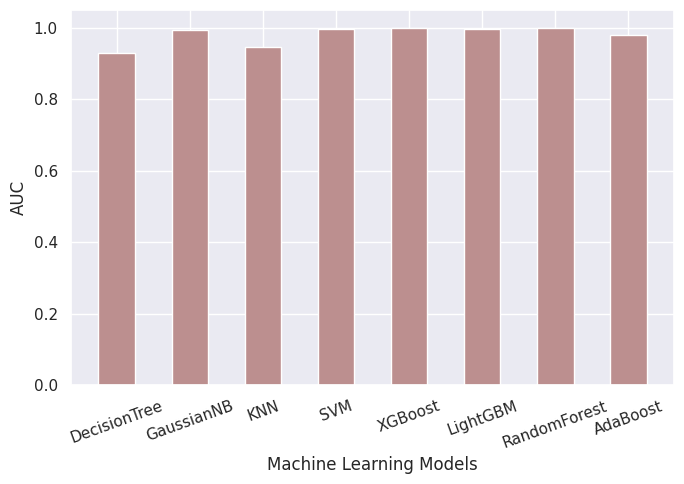

In [ ]:
# creating the bar plot for AUC

models = result_df_sorted['Machine Learning Models']
auc_roc = result_df_sorted['AUC']
# Figure Size
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True

# Horizontal Bar Plot
plt.bar(models, auc_roc, width = 0.5, color = 'rosybrown')

plt.xticks(rotation=20)
plt.xlabel("Machine Learning Models")
plt.ylabel("AUC")

# Show Plot
plt.show()

<Axes: xlabel='Machine Learning Models'>

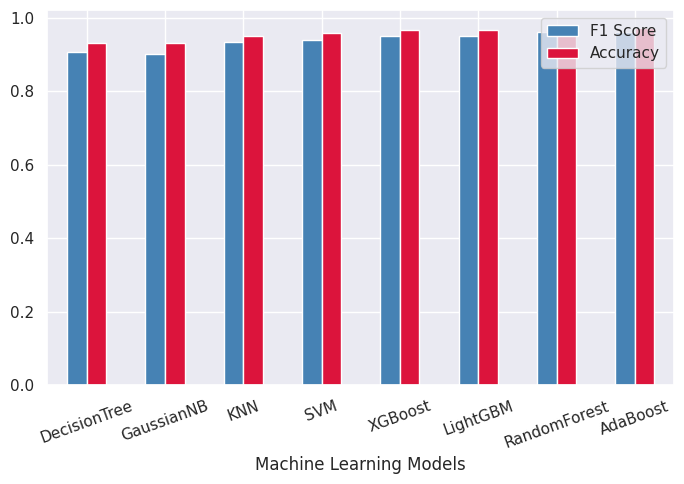

In [ ]:
fig, ax = plt.subplots()
result_df_sorted.plot.bar(x = 'Machine Learning Models', y = ['F1 Score', 'Accuracy'], color = ['steelblue', 'crimson'], rot = 20, ax = ax)
# for p in ax.patches:
#     ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()))

In [ ]:

'''
import matplotlib.pyplot as plt
import numpy as np


errorRateListOfSlow = np.array(result_df_sorted['F1 Score'])
errorRateListOfFast = np.array(result_df_sorted['Accuracy'])
model_names = np.array(result_df_sorted['Machine Learning Models'])




# errorRateListOfFast = ['9.09', '9.09', '9.38', '9.40', '7.89', '8.02', '10.00']
# errorRateListOfSlow = ['10.00', '13.04', '14.29', '12.50', '14.29', '14.53', '11.11']

# Convert to floats
# errorRateListOfFast = [float(x) for x in errorRateListOfFast]
# errorRateListOfSlow = [float(x) for x in errorRateListOfSlow]

opacity = 0.4
bar_width = 0.35

plt.xlabel('Tasks')
plt.ylabel('Error Rate')

plt.xticks(range(len(errorRateListOfFast)),model_names, rotation=80)
bar1 = plt.bar(np.arange(len(errorRateListOfFast)) + bar_width, errorRateListOfFast, bar_width, align='center', alpha=opacity, color='b', label='Fast <= 6 sec.')
bar2 = plt.bar(range(len(errorRateListOfSlow)), errorRateListOfSlow, bar_width, align='center', alpha=opacity, color='r', label='Slower > 6 sec.')

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n\nerrorRateListOfSlow = np.array(result_df_sorted['F1 Score'])\nerrorRateListOfFast = np.array(result_df_sorted['Accuracy'])\nmodel_names = np.array(result_df_sorted['Machine Learning Models'])\n\n\n\n\n# errorRateListOfFast = ['9.09', '9.09', '9.38', '9.40', '7.89', '8.02', '10.00']\n# errorRateListOfSlow = ['10.00', '13.04', '14.29', '12.50', '14.29', '14.53', '11.11']\n\n# Convert to floats\n# errorRateListOfFast = [float(x) for x in errorRateListOfFast]\n# errorRateListOfSlow = [float(x) for x in errorRateListOfSlow]\n\nopacity = 0.4\nbar_width = 0.35\n\nplt.xlabel('Tasks')\nplt.ylabel('Error Rate')\n\nplt.xticks(range(len(errorRateListOfFast)),model_names, rotation=80)\nbar1 = plt.bar(np.arange(len(errorRateListOfFast)) + bar_width, errorRateListOfFast, bar_width, align='center', alpha=opacity, color='b', label='Fast <= 6 sec.')\nbar2 = plt.bar(range(len(errorRateListOfSlow)), errorRateListOfSlow, bar_width, align='center',

### AUC curve

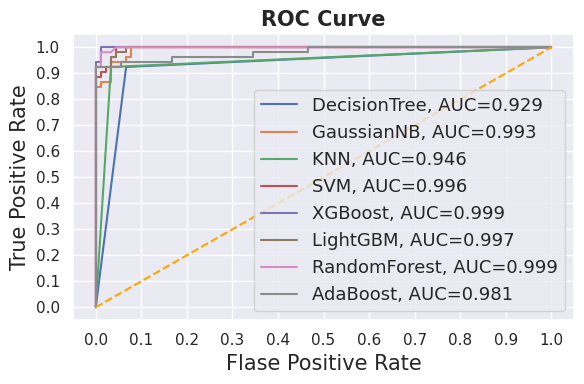

In [ ]:
fpr_n = result_df_sorted.loc[0]['Machine Learning Models']
all_classifiers = result_df_sorted['Machine Learning Models'].to_numpy()
all_fpr = result_df_sorted['FPR']
all_tpr = result_df_sorted['TPR']
all_auc = result_df_sorted["AUC"]
#print(all_classifiers)
#print(all_fpr)
#print(all_tpr)

#Plot the figure
fig = plt.figure(figsize=(6,4))

for i in range(all_classifiers.shape[0]):
    plt.plot(all_fpr[i],
             all_tpr[i],
             label="{}, AUC={:.3f}".format(all_classifiers[i], all_auc[i]))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
#fig.savefig('multiple_roc_curve.png')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier